In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sc
from scipy.optimize import curve_fit
from scipy.special import i0,i1,k0,k1
from scipy.constants import G
from scipy.constants import parsec as pc
msun=1.989e+30
kpc=1e+3*pc
g1=4.302e-6

In [17]:
def vbulge(r,lrh,a):
    rh0=np.power(10,lrh)
    vs=2*np.pi*G*rh0*a*r/(1+r/a)**2
    vbg=1e-3*np.sqrt(vs)
    return vbg

In [18]:
column_names=["Rad","Vobs","errV","Vgas","Vdisk","Vbul","SBdisk","SBbul"]
dir="/home/esha/Documents/anurag/nav/sparc"
df_list=[]
for gal in os.listdir(dir):
    #print(gal)
    if gal.endswith('.csv'):
        file_path=os.path.join(dir,gal)
        #print(file_path)
        df_gal=pd.read_csv(file_path,names=column_names)
        df_gal['Galaxy']=os.path.splitext(gal)[0]
        df_list.append(df_gal)
combined_df=pd.concat(df_list,ignore_index=True)


In [19]:
combined_df.head()

,Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul,Galaxy
0,0.63,262.0,73.6,-0.79,82.82,389.26,1981.83,3538.94,UGC03546
1,0.79,250.0,55.5,-0.85,98.90,366.12,1833.29,1444.35,UGC03546
2,0.95,241.0,42.9,-0.88,113.48,343.54,1695.88,614.37,UGC03546
3,1.11,234.0,31.9,-0.87,126.74,322.48,1568.78,245.76,UGC03546
4,1.27,228.0,28.8,-0.80,138.83,303.96,1451.19,56.22,UGC03546


In [20]:
combined_df.dtypes

Rad       float64
Vobs      float64
errV      float64
Vgas      float64
Vdisk     float64
Vbul      float64
SBdisk    float64
SBbul     float64
Galaxy     object
dtype: object

In [21]:
len(combined_df['Galaxy'].unique())

138

In [22]:
combined_df[combined_df['Galaxy']=='UGC03546']['Vbul'].sum()

5406.0199999999995

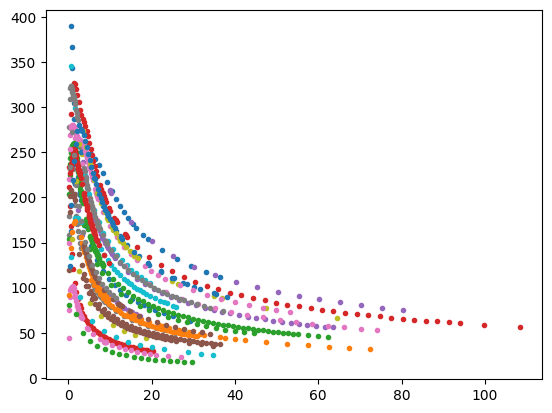

In [23]:
uniq_gal=combined_df['Galaxy'].unique()
for gal in uniq_gal:
    vg=combined_df[combined_df['Galaxy']==gal]['Vbul']
    rd=combined_df[combined_df['Galaxy']==gal]['Rad']
    if vg.sum()>0:
        plt.scatter(rd,vg,marker='.')
    
    

In [24]:
meta=[]
with open('metadata.txt','r') as file:
    line=file.readlines()
for lines in line:
    field=lines.strip().split()
    meta.append(field)
    

In [25]:
def fit_bulge(df,gal_name,kpc,msun):
    gal_data=df[df['Galaxy']==gal_name]
    r=gal_data['Rad']*kpc
    vb=gal_data['Vbul']
    bounds=([-21,0],[-14,50*kpc])
    guess=(-20.0,10*kpc)
    popt,pcov=curve_fit(vbulge,r,vb,p0=guess,bounds=bounds)
    return popt,pcov    
    

In [26]:
combined_df[combined_df['Galaxy']=='UGC03546']['Vbul'].sum()

5406.0199999999995

In [27]:
sb_val=[]
rb_val=[]
output_file="bulge_fit.txt"
with open(output_file,'w') as f:
    f.write("Galaxy\t sb \t rb\n")
    for gal in uniq_gal:
        if combined_df[combined_df['Galaxy']==gal]['Vbul'].sum()>0:
            s,t=fit_bulge(combined_df,gal,kpc,msun)
            sb=np.power(10,s[0])
            sb_val.append(sb)
            rb_val.append(s[1])
            f.write(f"{gal}\t{sb}\t{s[1]}\n")
        else:
            sb_val.append(0)
            rb_val.append(0)
            f.write(f"{gal}\t{0}\t{0}\n")

In [28]:
len(sb_val)

138

In [29]:
def vbulge2(r,sg,a):
    rh0=sg*1.477e28
    a1=a*3.24e-20
    vs=2*np.pi*g1*rh0*a1*r/(1+r/a1)**2
    vbg=np.sqrt(vs)
    return vbg

/tmp/ipykernel_150881/1076860525.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


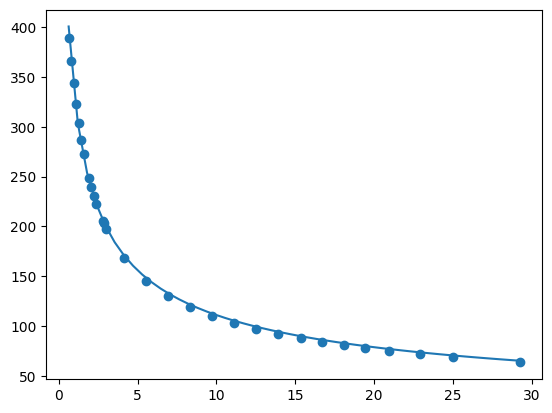

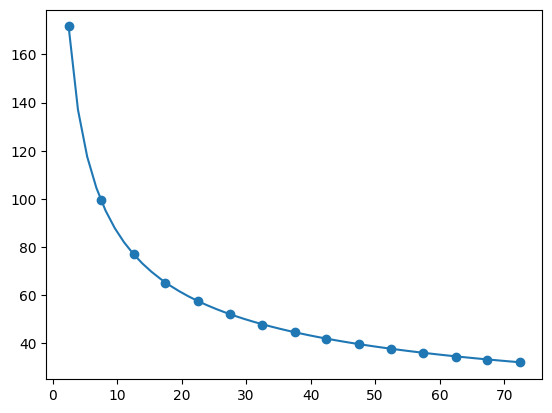

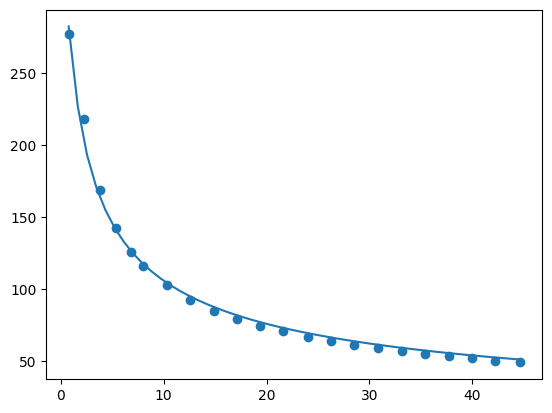

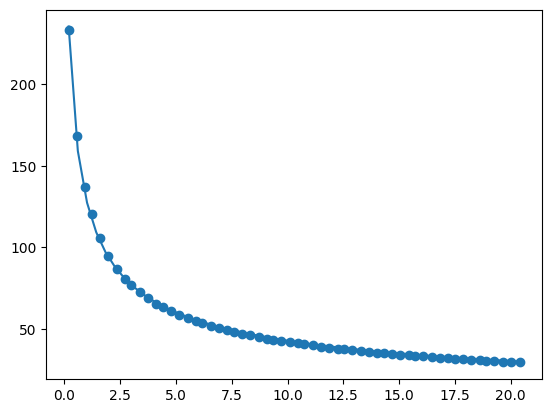

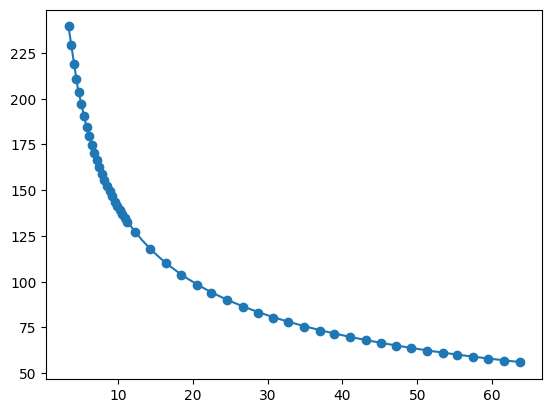

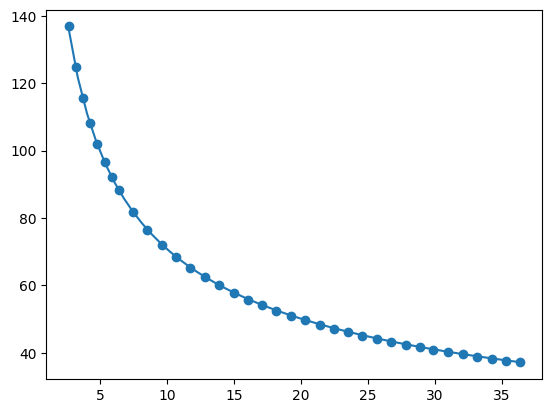

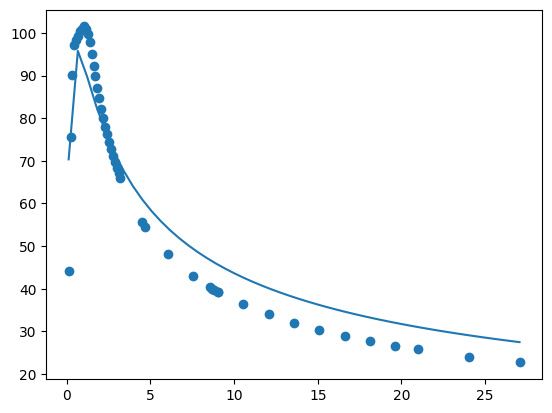

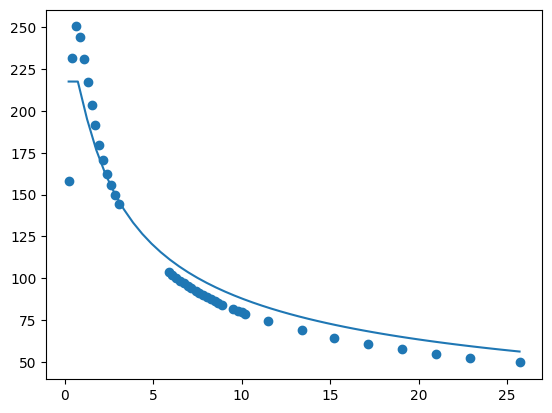

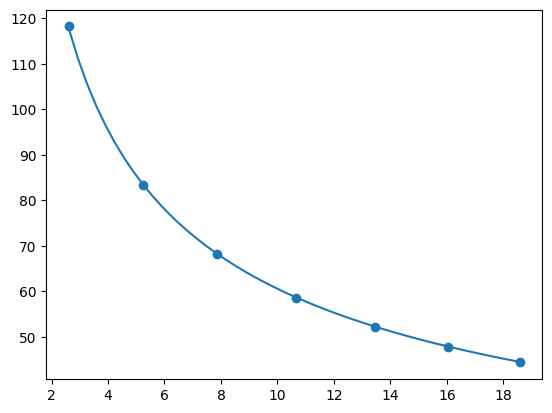

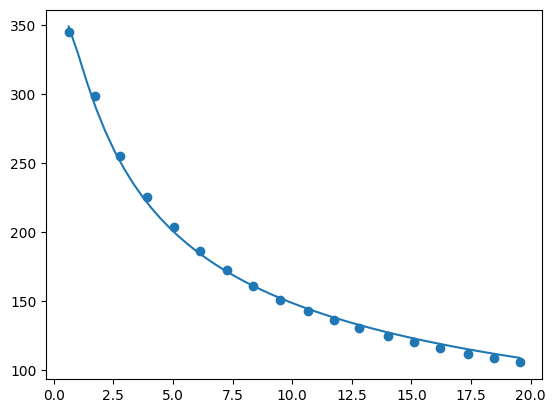

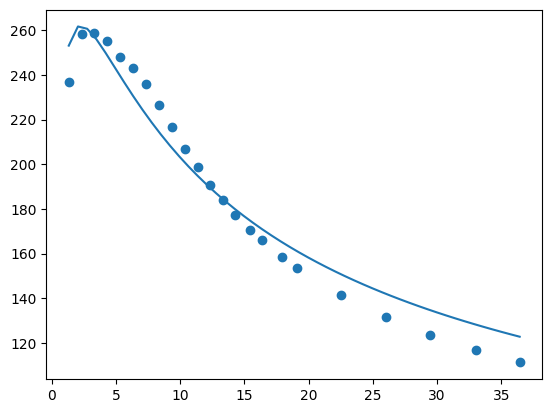

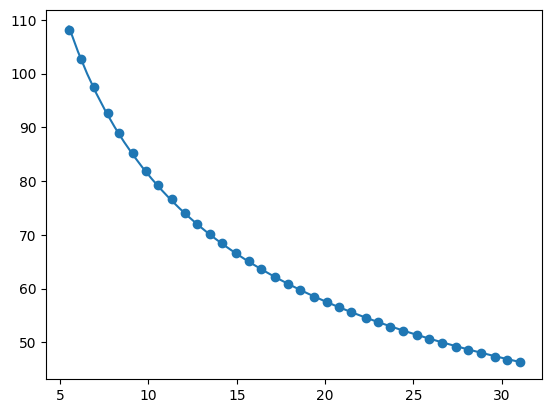

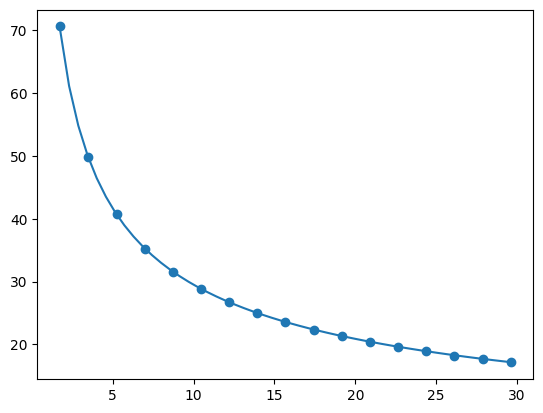

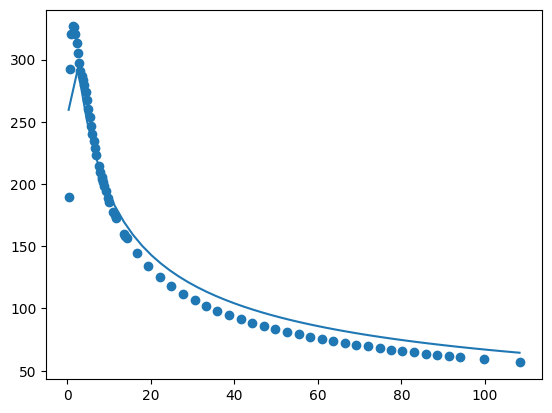

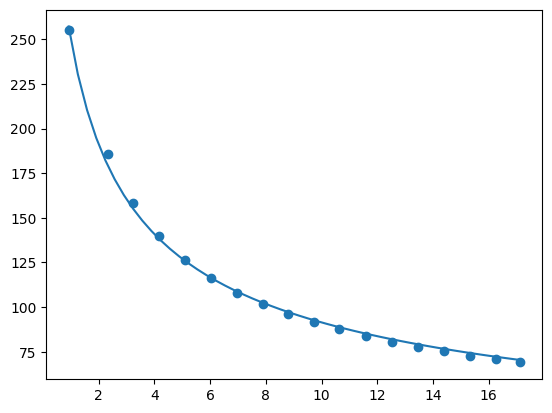

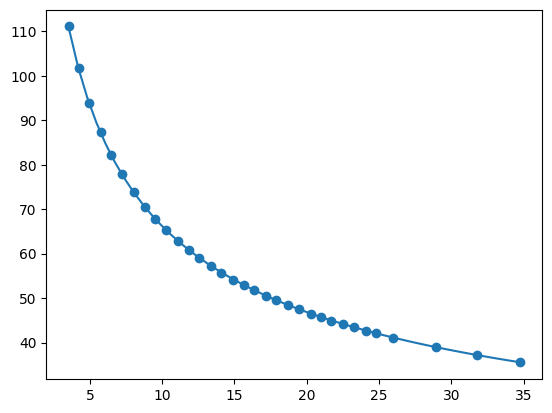

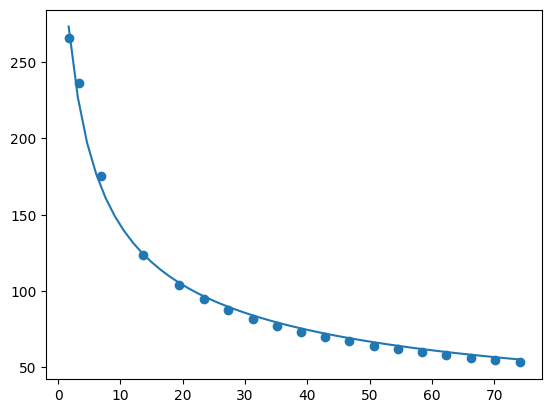

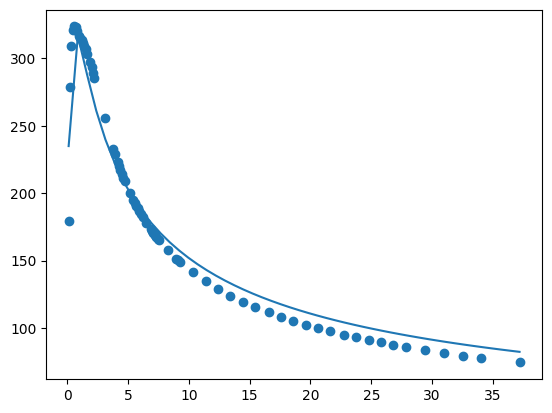

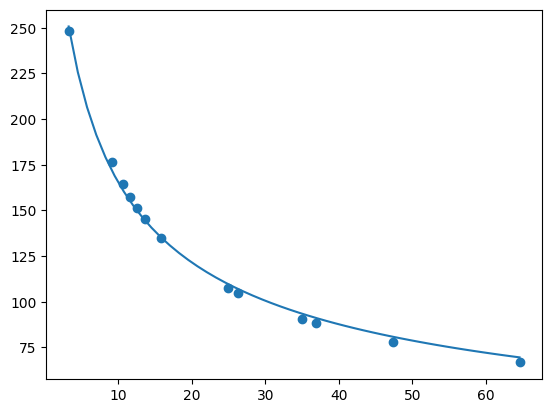

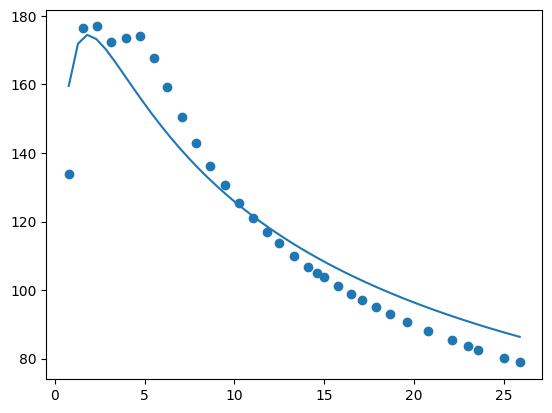

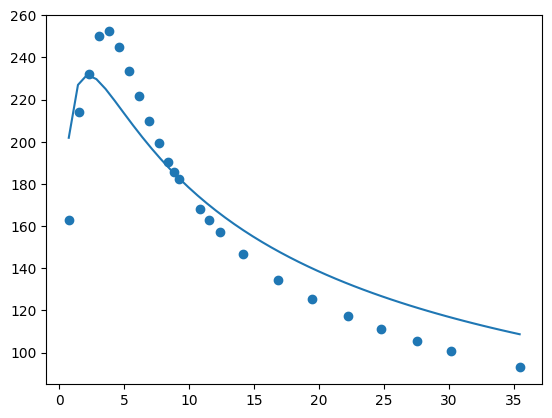

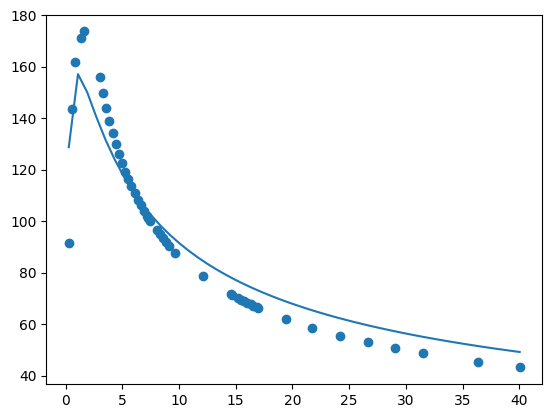

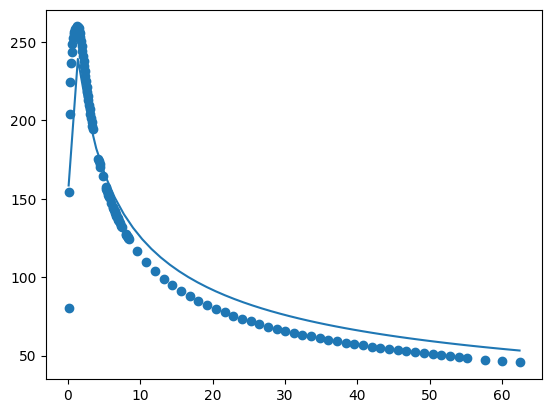

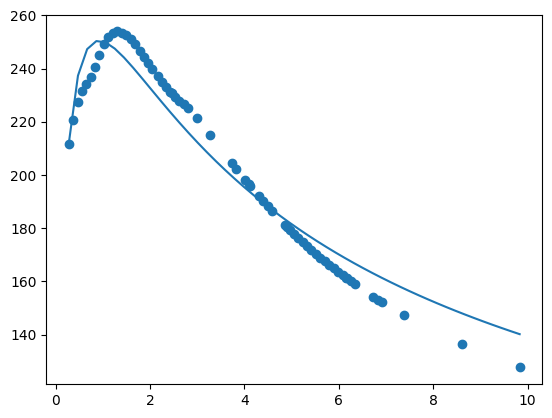

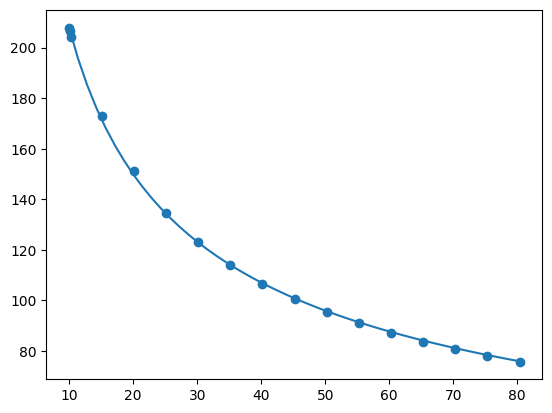

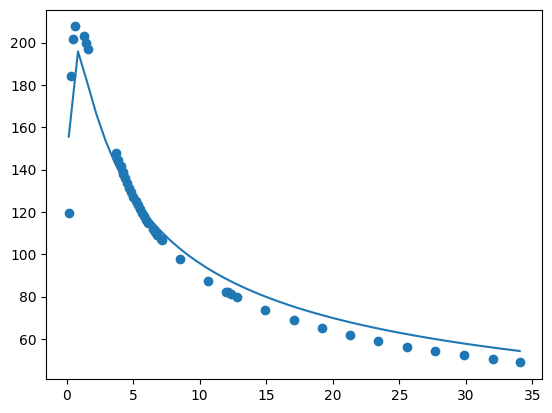

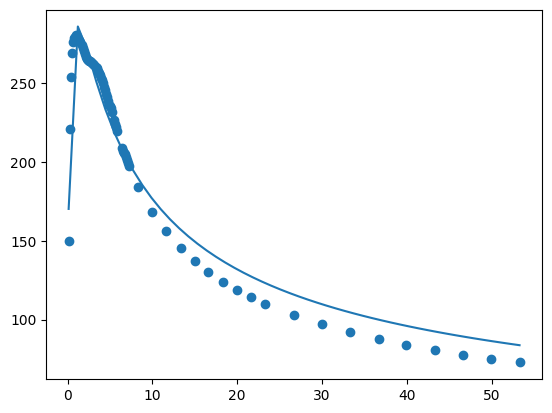

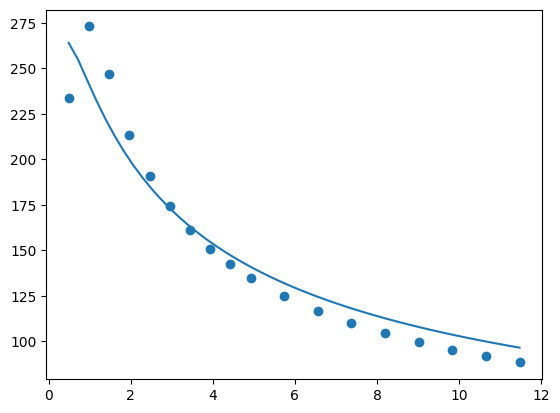

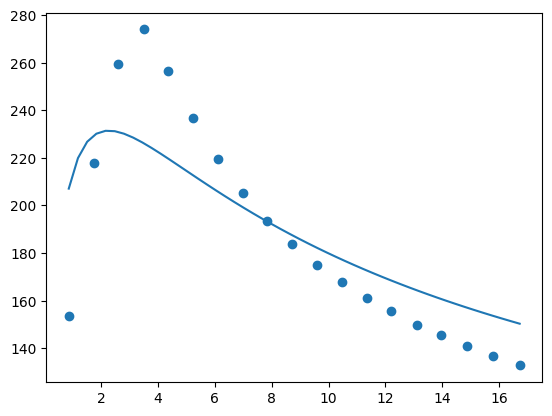

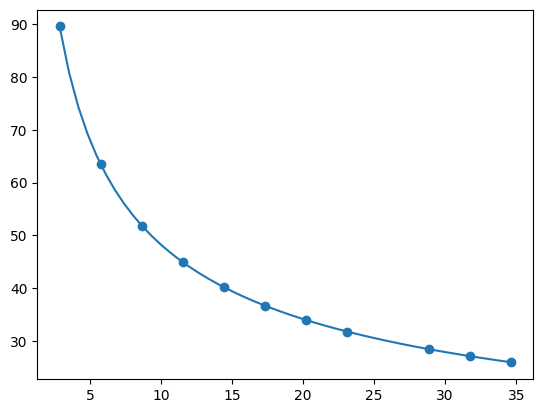

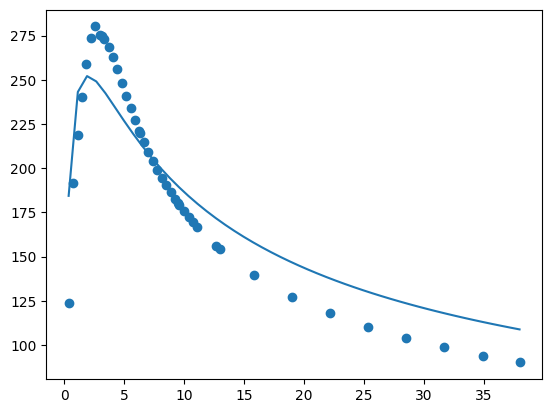

In [30]:
i=0
for gal in uniq_gal:
    dt=combined_df[combined_df['Galaxy']==gal]
    rdt=dt['Rad']
    bdt=dt['Vbul']
    rad=np.linspace(min(rdt),max(rdt))
    if bdt.sum()>0:
        plt.figure()
        plt.scatter(rdt,bdt)
        plt.plot(rad,vbulge2(rad,sb_val[i],rb_val[i]))
    i=i+1